In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#Cargamos el Dataset y vemos sus primeras 5 filas
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
# Informacion del Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [69]:
#Descripcion estadistica del Dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [70]:
#Verificamos valores nulos
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [71]:
# Verificamos duplicados
df.duplicated().sum()

1

In [72]:
# Eliminamos el duplicados
df = df.drop_duplicates()

In [73]:
# confirmamos
df.duplicated().sum()

0


Distribución de especies:
species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64


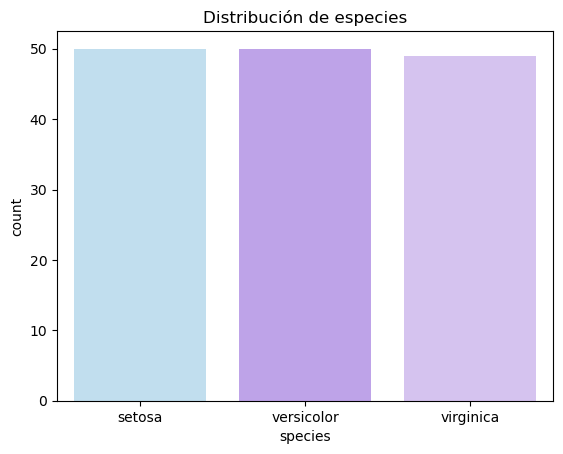

In [88]:
# En esta grafica de barras podemos ver el registro de cada especies, El dataset está balanceado.
print("\nDistribución de especies:")
print(df['species'].value_counts())
sns.countplot(x="species", data=df, palette=['#bae0f5','#bc98f3', '#d3bcf6'])
plt.title("Distribución de especies");
plt.savefig("barras.png", dpi=300, bbox_inches='tight')

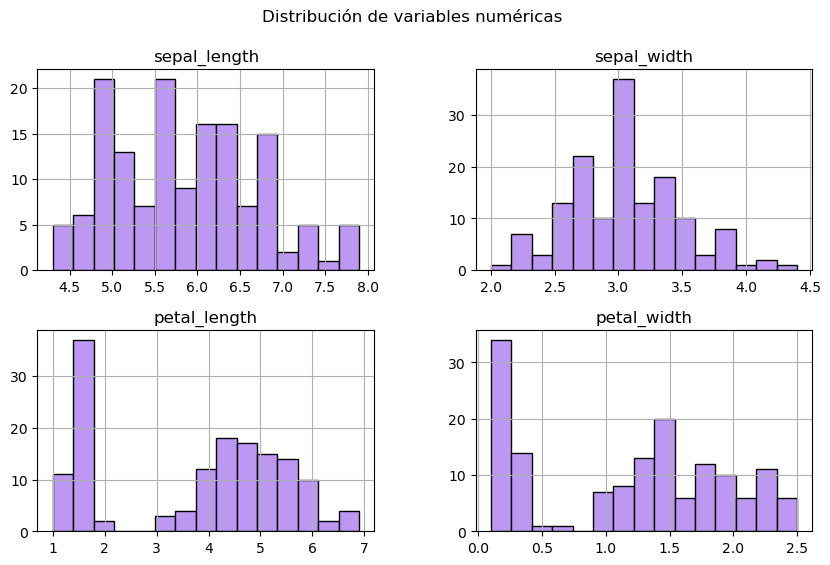

In [87]:
# Los pétalos son mucho mejores que los sépalos para diferenciar especies.
df.drop(columns=['species']).hist(bins=15, figsize=(10, 6), edgecolor="black", color='#bc98f3')
plt.suptitle("Distribución de variables numéricas");
plt.savefig("drop.png", dpi=300, bbox_inches='tight')

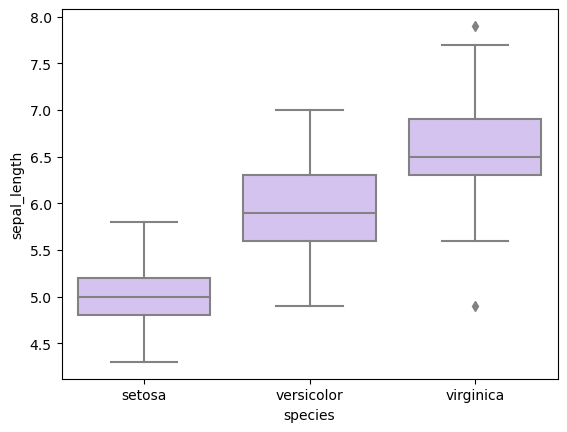

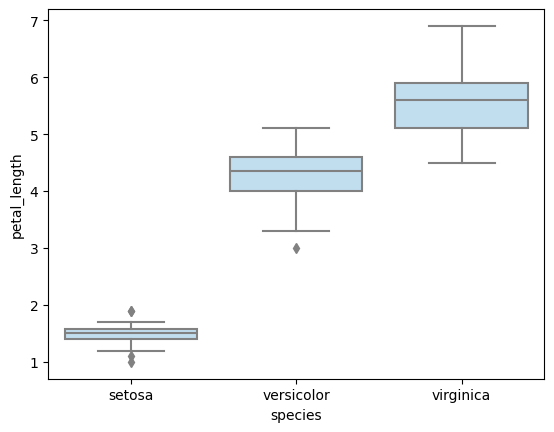

In [86]:
# Setosa es fácil de clasificar; Versicolor y Virginica se parecen más.
sns.boxplot(x="species", y="sepal_length", data=df, color='#d3bcf6')
plt.savefig("boxplot1", dpi=300, bbox_inches='tight')
plt.show()

sns.boxplot(x="species", y="petal_length", data=df, color='#bae0f5')
#plt.savefig("boxplot2", dpi=300, bbox_inches='tight')
plt.show()
         

c:\Users\Mgh59\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mgh59\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mgh59\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mgh59\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

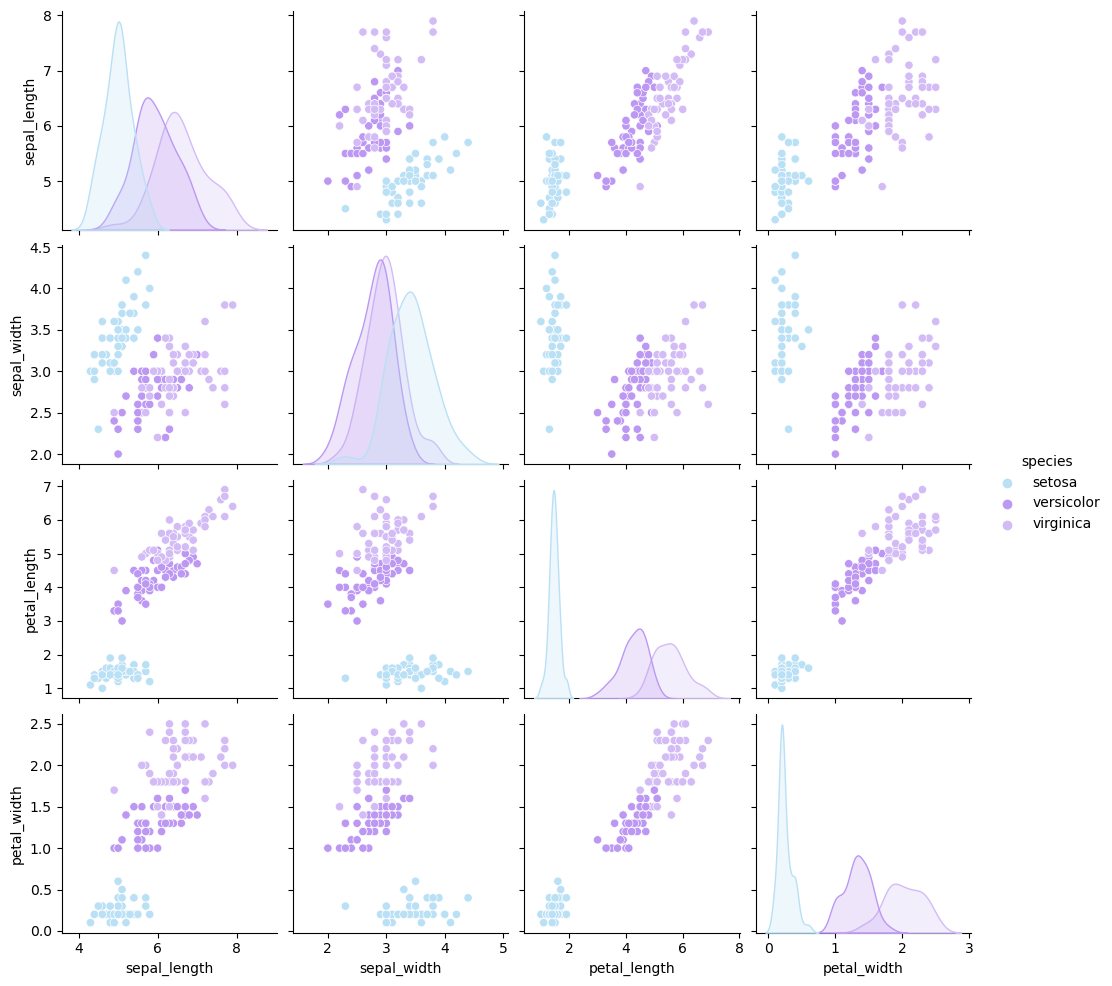

In [83]:
# Setosa es fácil de clasificar; Versicolor y Virginica se parecen más.
# Setosa queda perfectamente separado de las otras especies (color Azul)
colors = ['#bae0f5','#bc98f3', '#d3bcf6']
sns.pairplot(df, hue="species", diag_kind="kde", palette=colors)
plt.savefig("grafico_seaborn.png", dpi=300, bbox_inches='tight')
plt.show()
          

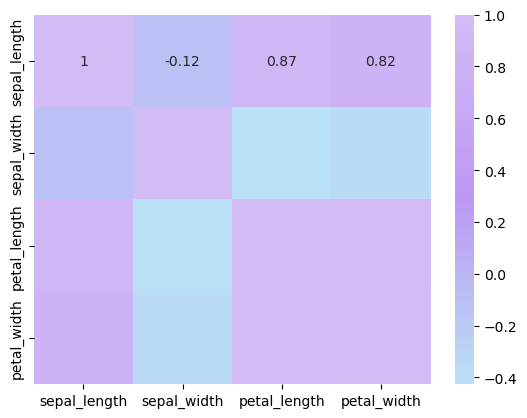

In [84]:
# Existe alta correlación entre petal_length y petal_width.
from matplotlib.colors import LinearSegmentedColormap
colors = ['#bae0f5','#bc98f3', '#d3bcf6']

cmap = LinearSegmentedColormap.from_list("mi_mapa",colors)

sns.heatmap(df.drop(columns=["species"]).corr(),
            annot=True, cmap=cmap)
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')         

In [90]:
df.to_csv("EDA_Iris.csv", index=False)      